In [3]:
%matplotlib inline
from __future__ import division, print_function
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
import sys, os
home = os.path.expanduser("~")+'/'
sys.path.append(home+'git/Python/user_modules/')
import match_coord

In [ ]:
os

-------
## MOSDEF

In [4]:
cat = Table.read('/Users/roz18/Documents/Temp/desi-truth-table/mosdef_zcat.16aug2016.fits')
print(len(cat))
# mask = cat['Z_MOSFIRE']>0
# cat = cat[mask]
# print(len(cat))

1002


In [53]:
cat

FIELD,ID_V2,ID_V4,RA,DEC,Z_MOSFIRE,MASKNAME,TARGET
str7,int32,int32,float64,float64,float32,str6,int32
AEGIS,12870,36257,214.71847534,52.79872513,2.13066,ae2_03,1
AEGIS,13032,36492,214.71713257,52.79933167,-1.0,ae2_03,0
AEGIS,12793,36104,214.72564697,52.80254745,-1.0,ae2_03,1
AEGIS,12528,34966,214.73649597,52.80632401,1.41767,ae2_03,1
AEGIS,12046,33808,214.7375946,52.80190277,2.22544,ae2_03,1
AEGIS,11578,32354,214.74291992,52.79995728,2.13278,ae2_03,1
AEGIS,11491,31562,214.74472046,52.799366,-1.0,ae2_03,0
AEGIS,11299,31044,214.75021362,52.80117035,2.29454,ae2_03,1
AEGIS,10503,28799,214.75624084,52.79592896,2.21404,ae2_03,1


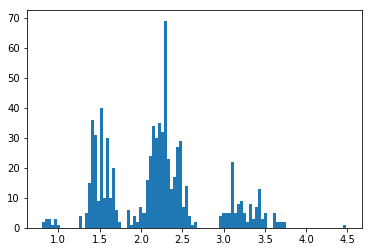

In [5]:
mask = cat['Z_MOSFIRE']>0
plt.hist(cat['Z_MOSFIRE'][mask], 100)
plt.show()

26 2.59%
True
True


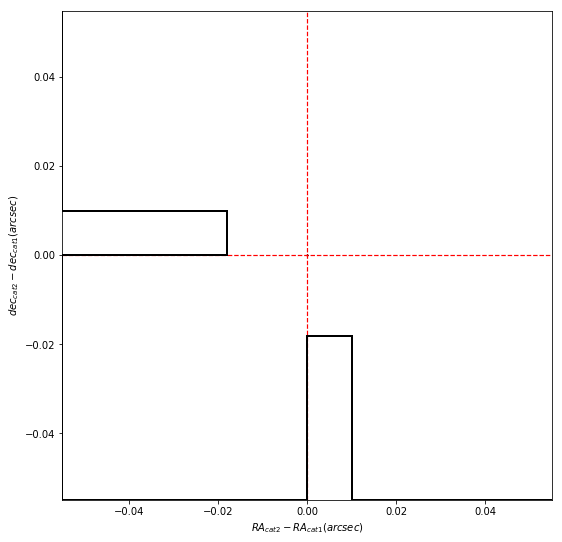

In [24]:
# select primary objects with Z_MOSFIRE>0
# mask = cat['TARGET']==1
mask = (cat['TARGET']==1) & (cat['Z_MOSFIRE']>0)
n_duplicates, idx1, idx2 = match_coord.match_self(cat['RA'][mask], cat['DEC'][mask], search_radius=1, 
                                                  return_indices=True, plot_q=True)
print(n_duplicates, '{:.2f}%'.format(n_duplicates/len(cat)*100))
print(np.all(cat['RA'][mask][idx1] - cat['RA'][mask][idx2]==0))
print(np.all(cat['DEC'][mask][idx1] - cat['DEC'][mask][idx2]==0))

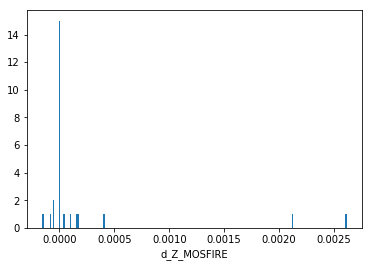

In [26]:
plt.hist(cat['Z_MOSFIRE'][mask][idx1] - cat['Z_MOSFIRE'][mask][idx2], bins=200)
plt.xlabel('d_Z_MOSFIRE')
plt.show()

__These 26 objects are indeed duplicates. Since there is no way to select the better observation and the redshift estimates are almost identical, we simply keep all of them in the catalog and let the catalog matching code remove the duplicates. __

__Output catalog for viewer:__

In [10]:
mask = (cat['TARGET']==1) & (cat['Z_MOSFIRE']>0)
cat1 = Table()
cat1['RA'] = cat['RA'][mask]
cat1['DEC'] = cat['DEC'][mask]
cat1.write('/Users/roz18/Documents/Temp/desi-truth-table/viewer/viewer-mosdef.fits')

-------
## FMOS-COSMOS

In [58]:
cat = Table.read('/Users/roz18/Documents/Temp/desi-truth-table/FMOS_COSMOS_v1.0.fits')
print(len(cat))
# mask = cat['ZSPEC']>0
# cat = cat[mask]
# print(len(cat))

1153


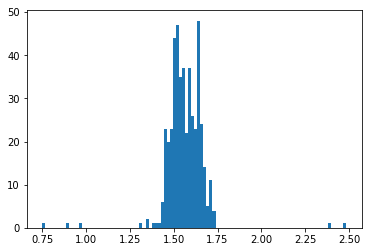

In [61]:
mask = cat['ZSPEC']>0
plt.hist(cat['ZSPEC'][mask], 100)
plt.show()

In [62]:
cat

FMOS_ID,RA,DEC,TYPE,ZSPEC,ZFLAG,DATE_OBS_HL,DATE_OBS_JL,OBS_HL,OBS_JL,DET_HALPHA,DET_NII6583,DET_HBETA,DET_OIII5007,FLUX_HALPHA,SN_HALPHA,FLUXLOSS_HALPHA,AMPL_HALPHA,AMPL_ERR_HALPHA,FWHM_HALPHA,FWHM_ERR_HALPHA,FLUX_NII6583,SN_NII6583,FLUXLOSS_NII6583,AMPL_NII6583,AMPL_ERR_NII6583,FWHM_NII6583,FWHM_ERR_NII6583,FLUX_HBETA,SN_HBETA,FLUXLOSS_HBETA,AMPL_HBETA,AMPL_ERR_HBETA,FWHM_HBETA,FWHM_ERR_HBETA,FLUX_OIII5007,SN_OIII5007,FLUXLOSS_OIII5007,AMPL_OIII5007,AMPL_ERR_OIII5007,FWHM_OIII5007,FWHM_ERR_OIII5007,UPLIM_HALPHA,UPLIM_NII6583,UPLIM_HBETA,UPLIM_OIII5007,APERCORR_HALPHA,APERCORR_HBETA
str21,float64,float64,int16,float64,int16,str8,str8,int16,int16,int16,int16,int16,int16,float64,float32,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32
FMOS_J095943.6+014211,149.93179,1.7029167,0,1.67110011843,4,20130120,20130122,1,1,1,1,0,0,3.14819598028e-17,5.73,0.19778111182,1.55183774717e-18,2.86817894322e-19,325.840331401,56.483406702,1.03775659997e-17,2.66,0.083916462691,5.09985294123e-19,1.91450245406e-19,325.810610249,56.4885592411,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,3.74181e-17,2.14974,3.06189
FMOS_J095934.7+014251,149.8945,1.7141944,0,-999.0,0,20130120,--------,1,0,0,0,0,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
FMOS_J095936.5+014251,149.902,1.71425,0,-999.0,0,20130120,--------,1,0,0,0,0,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
FMOS_J095925.2+014254,149.85483,1.7150556,0,-999.0,0,20120313,--------,1,0,0,0,0,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
FMOS_J095933.0+014258,149.88729,1.7160278,0,-999.0,0,20120313,--------,1,0,0,0,0,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
FMOS_J095956.4+014311,149.98513,1.7196667,0,-999.0,0,20130120,--------,1,0,0,0,0,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
FMOS_J095914.4+014328,149.81012,1.7244444,0,1.50422442882,1,20120313,20130122,1,1,1,0,0,0,5.45864767153e-17,2.37,0.632927101893,2.20788922388e-18,1.62958586866e-18,423.559174198,167.135814972,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,7.89147e-17,8.45918e-17,1.72878,1.95952
FMOS_J095937.9+014360,149.908,1.73325,0,-999.0,0,20120313,--------,1,0,0,0,0,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
FMOS_J095910.7+014405,149.79475,1.73475,0,1.71175357807,3,20130120,--------,1,0,1,0,0,0,5.64807486636e-17,7.4,0.0929340803473,4.91574876745e-18,5.54825922094e-19,181.777489314,30.7454903373,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.

In [63]:
n_duplicates, idx1, idx2 = match_coord.match_self(cat['RA'], cat['DEC'], search_radius=1, 
                                                  return_indices=True, plot_q=True)
print(n_duplicates, '{:.2f}%'.format(n_duplicates/len(cat)*100))

0 0.00%


-------------------
## 3D-HST

In [65]:
cat = Table.read('/Users/roz18/Documents/Temp/desi-truth-table/3dhst.v4.1.5.master.fits.gz')
print(len(cat))
# mask = (cat['z_max_grism']>0)
# cat = cat[mask]
# print(len(cat))

207967


In [67]:
counts = Table()
counts['field'], counts['count'] = np.unique(cat['field'], return_counts=True)
counts

field,count
str6,int64
aegis,41200
cosmos,33879
goodsn,38279
goodss,50507
uds,44102


In [68]:
mask = cat['field']=='aegis'
cat = cat[mask]
print(len(cat))

41200


In [69]:
cat

phot_id,ra,dec,x,y,grism_id,ifield,field,pointings,npoint,jh_mag,z_spec,z_peak_phot,z_phot_l95,z_phot_l68,z_phot_u68,z_phot_u95,z_max_grism,z_peak_grism,z_grism_l95,z_grism_l68,z_grism_u68,z_grism_u95,f_cover,f_flagged,max_contam,int_contam,f_negative,flag1,flag2,use_zgrism,use_phot,z_best_s,z_best,z_best_l95,z_best_l68,z_best_u68,z_best_u95,number,linefit_grism_id,linefit_jh_mag,linefit_z_max_grism,s0,s0_err,s1,s1_err,Lya_FLUX,Lya_FLUX_ERR,Lya_SCALE,Lya_EQW,Lya_EQW_ERR,CIV_FLUX,CIV_FLUX_ERR,CIV_SCALE,CIV_EQW,CIV_EQW_ERR,MgII_FLUX,MgII_FLUX_ERR,MgII_SCALE,MgII_EQW,MgII_EQW_ERR,OII_FLUX,OII_FLUX_ERR,OII_SCALE,OII_EQW,OII_EQW_ERR,Hd_FLUX,Hd_FLUX_ERR,Hd_SCALE,Hd_EQW,Hd_EQW_ERR,Hg_FLUX,Hg_FLUX_ERR,Hg_SCALE,Hg_EQW,Hg_EQW_ERR,OIIIx_FLUX,OIIIx_FLUX_ERR,OIIIx_SCALE,OIIIx_EQW,OIIIx_EQW_ERR,HeII_FLUX,HeII_FLUX_ERR,HeII_SCALE,HeII_EQW,HeII_EQW_ERR,Hb_FLUX,Hb_FLUX_ERR,Hb_SCALE,Hb_EQW,Hb_EQW_ERR,OIII_FLUX,OIII_FLUX_ERR,OIII_SCALE,OIII_EQW,OIII_EQW_ERR,Ha_FLUX,Ha_FLUX_ERR,Ha_SCALE,Ha_EQW,Ha_EQW_ERR,SII_FLUX,SII_FLUX_ERR,SII_SCALE,SII_EQW,SII_EQW_ERR,SIII_FLUX,SIII_FLUX_ERR,SIII_SCALE,SIII_EQW,SIII_EQW_ERR,HeI_FLUX,HeI_FLUX_ERR,HeI_SCALE,HeI_EQW,HeI_EQW_ERR,HeIb_FLUX,HeIb_FLUX_ERR,HeIb_SCALE,HeIb_EQW,HeIb_EQW_ERR,NeIII_FLUX,NeIII_FLUX_ERR,NeIII_SCALE,NeIII_EQW,NeIII_EQW_ERR,NeV_FLUX,NeV_FLUX_ERR,NeV_SCALE,NeV_EQW,NeV_EQW_ERR,NeVI_FLUX,NeVI_FLUX_ERR,NeVI_SCALE,NeVI_EQW,NeVI_EQW_ERR,OI_FLUX,OI_FLUX_ERR,OI_SCALE,OI_EQW,OI_EQW_ERR,id_3,rf_z_best,z_type_3,rf_z_spec,DM,L153,nfilt153,L154,nfilt154,L155,nfilt155,L161,nfilt161,L162,nfilt162,L163,nfilt163,L156,nfilt156,L157,nfilt157,L158,nfilt158,L159,nfilt159,L160,nfilt160,L135,nfilt135,L136,nfilt136,L137,nfilt137,L138,nfilt138,L139,nfilt139,L270,nfilt270,L271,nfilt271,L272,nfilt272,L273,nfilt273,L274,nfilt274,L275,nfilt275,id_4,sfr,sfr_IR,sfr_UV,L_IR,L_UV,flag,sfr_z_best,z_type_4,f24tot,ef24tot,L_1600,L_2800,beta,id_5,z,ltau,metal,lage,Av,lmass,lsfr,lssfr,la2t,chi2
int64,float64,float64,float64,float64,str21,int64,str6,str20,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,int64,str22,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,int64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,215.22238159,53.00418472,9590.5,3057.3,00000,1,aegis,--,0,13.9635,-1.0,0.01,0.01,0.011,0.024,0.025,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1,0,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,1,00000,13.9635,-1.0,0.0,0.0,0.0,0.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99

In [72]:
mask = (cat['z_max_grism']>0)
print(np.sum(mask))

t = Table.read('/Users/roz18/Documents/Temp/desi-truth-table/3D-HST/aegis_3dhst_v4.1.5_catalogs/aegis_3dhst.v4.1.5.zfit.linematched.fits')
print(len(t))
mask = (t['z_max_grism']>0)
t = t[mask]
print(len(t))

14465
41200
14465


Since the line-matched catalog has the same number of objects as the master catalog and there are no duplicates in the line-matched catalog, the master catalog also don't have any duplicates. 

6094 14.79%


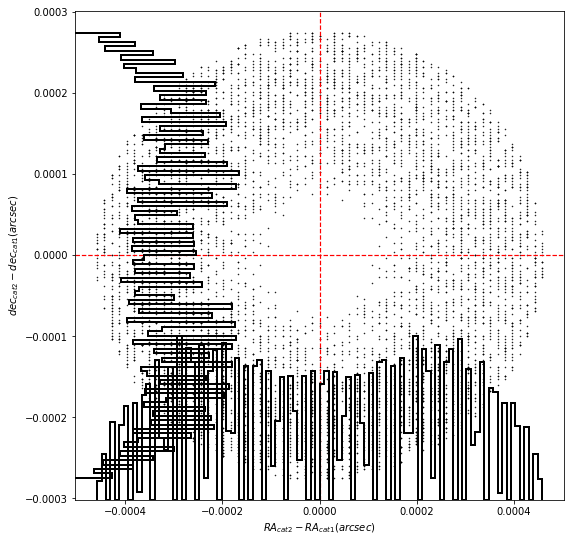

In [73]:
n_duplicates, idx1, idx2 = match_coord.match_self(cat['ra'], cat['dec'], search_radius=1, 
                                                  return_indices=True, plot_q=True)
print(n_duplicates, '{:.2f}%'.format(n_duplicates/len(cat)*100))

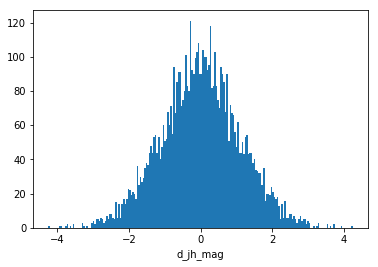

In [74]:
plt.hist(cat['jh_mag'][idx1] - cat['jh_mag'][idx2], bins=200)
plt.xlabel('d_jh_mag')
plt.show()

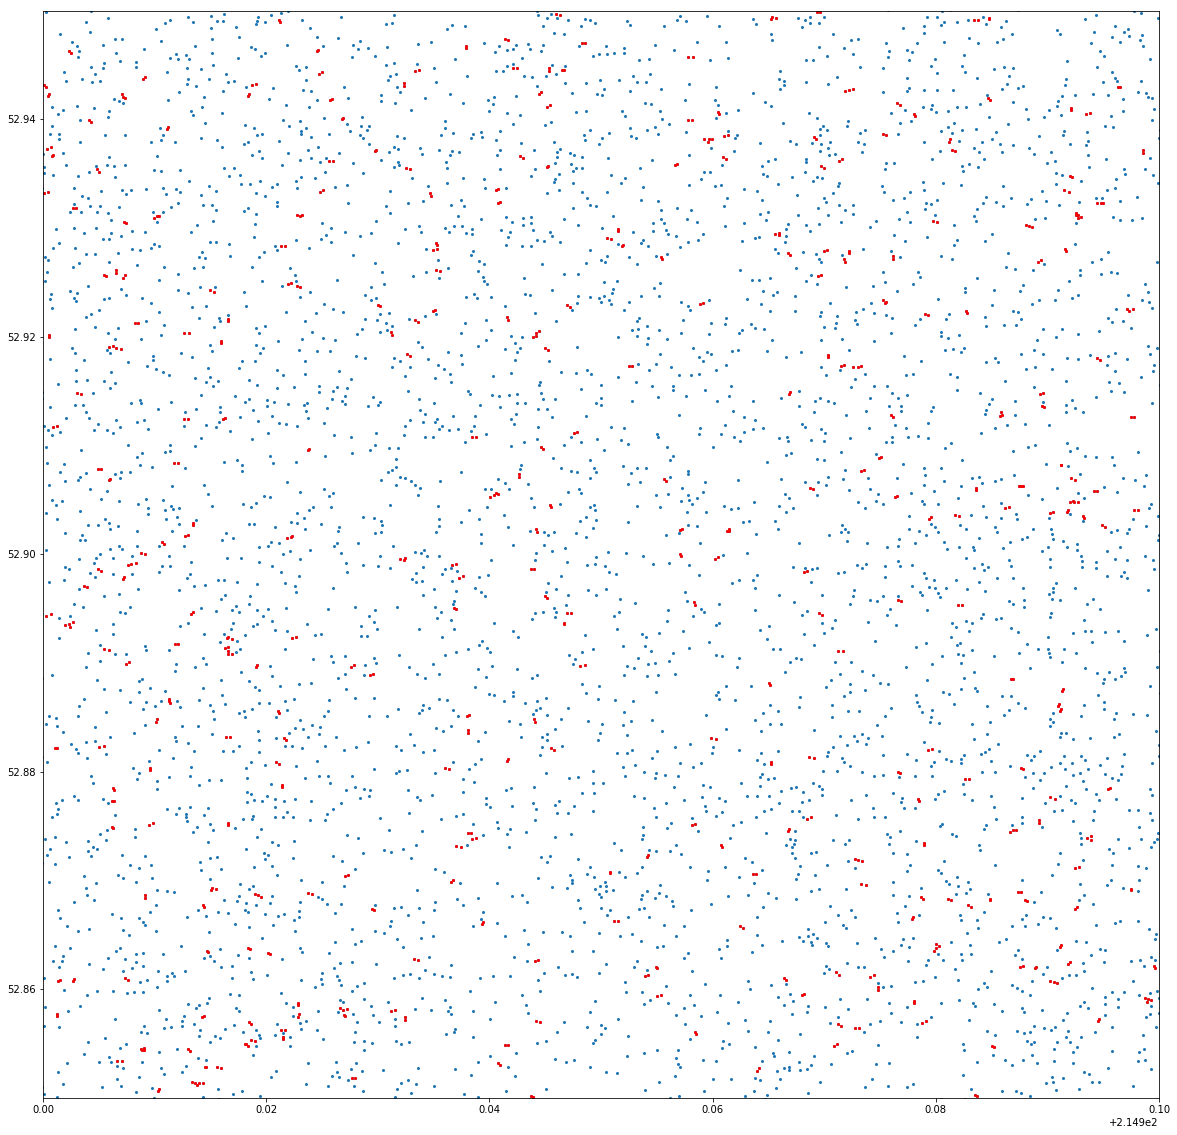

In [75]:
mask = cat['field']=='aegis'

n_duplicates, idx1, idx2 = match_coord.match_self(cat['ra'][mask], cat['dec'][mask], search_radius=1, 
                                                  return_indices=True, plot_q=False)

plt.figure(figsize=(20, 20))
plt.plot(cat['ra'][mask], cat['dec'][mask], '.', markersize=4)
plt.plot(cat['ra'][mask][idx1], cat['dec'][mask][idx1], 'r.', markersize=4)
plt.axis([214.9, 215.0, 52.85, 52.95])
plt.show()

DEEP2+DEEP3 objects:

In [76]:
t = Table.read('/Users/roz18/Downloads/alldeep.egs.uniq.2012jun13.fits.gz')

144 0.60%


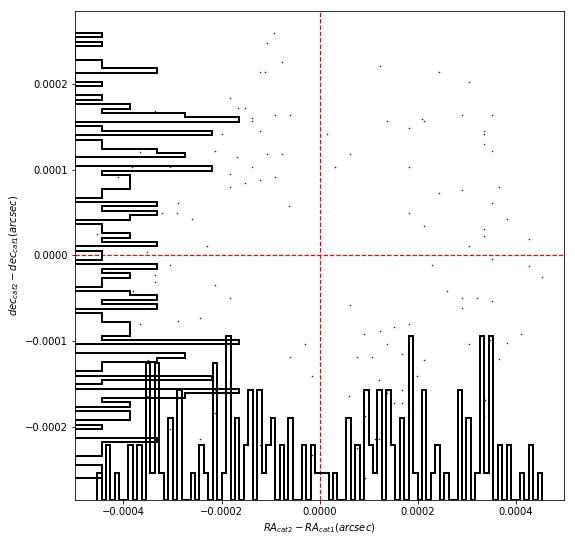

In [77]:
n_duplicates, idx1, idx2 = match_coord.match_self(t['RA'], t['DEC'], search_radius=1, 
                                                  return_indices=True, plot_q=True)
print(n_duplicates, '{:.2f}%'.format(n_duplicates/len(t)*100))

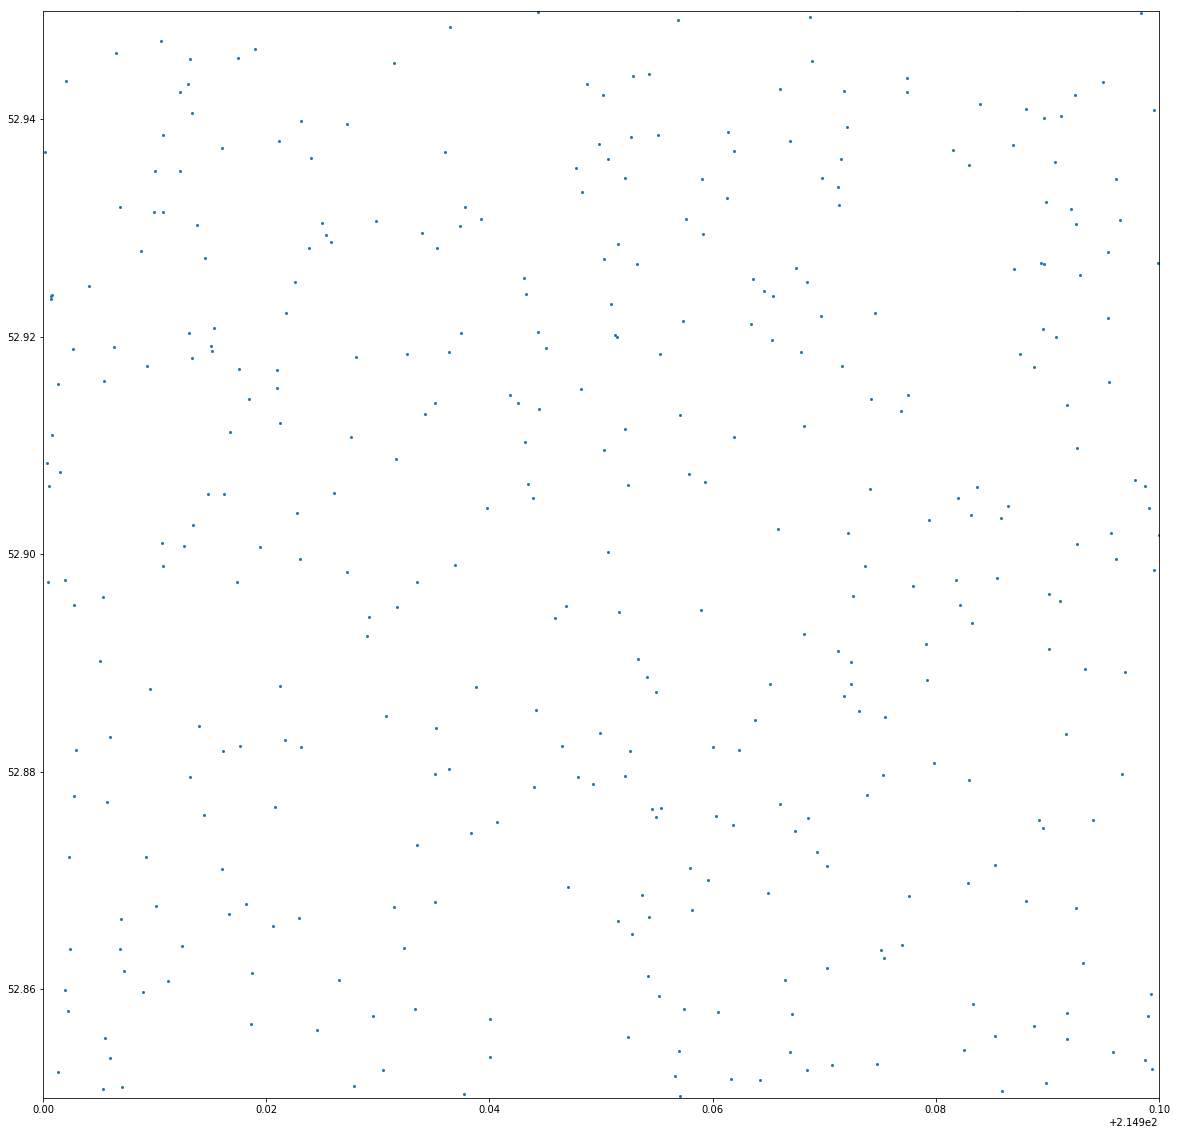

In [78]:
plt.figure(figsize=(20, 20))
plt.plot(t['RA'], t['DEC'], '.', markersize=4)
plt.axis([214.9, 215.0, 52.85, 52.95])
plt.show()

__Output fits file for Legacy Survey Viewer__

In [14]:
rectangle = [214.9, 215.0, 52.85, 52.95]

mask = (cat['ra']>rectangle[0]) & (cat['ra']<rectangle[1]) & \
       (cat['dec']>rectangle[2]) & (cat['dec']<rectangle[3])

mask &= cat['field']=='aegis'
cat1 = Table()
cat1['ra'] = cat['ra'][mask]
cat1['dec'] = cat['dec'][mask]
cat1.write('/Users/roz18/Documents/Temp/desi-truth-table/3dhst-part-of-aegis.fits')